In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# EDA

In [2]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [5]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [6]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

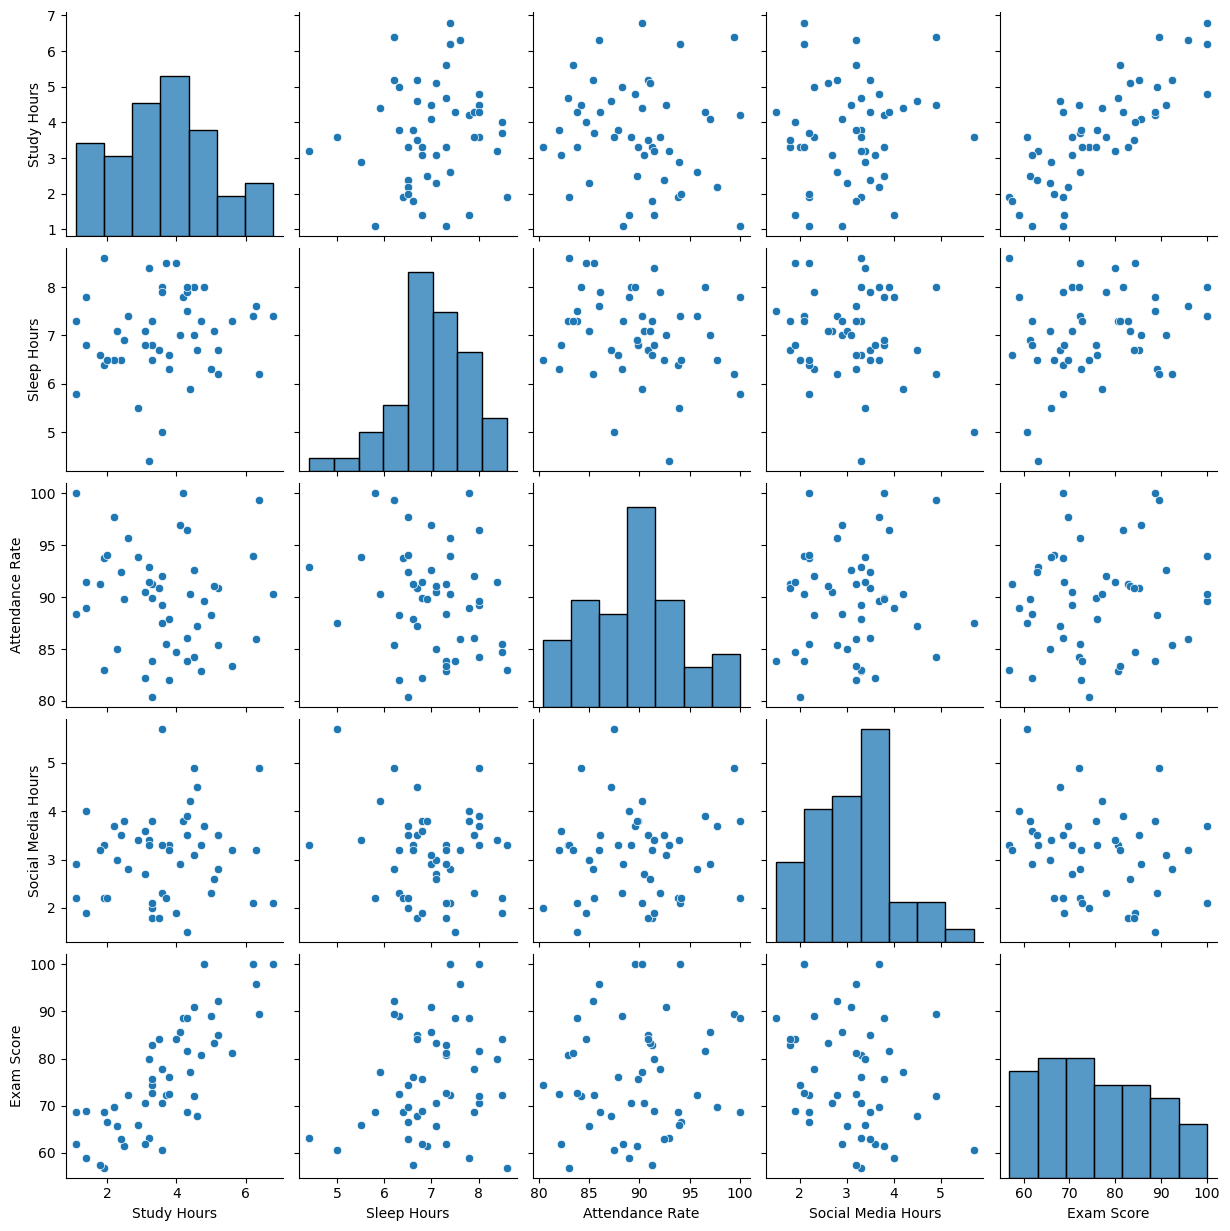

In [7]:
sns.pairplot(df)
plt.show()

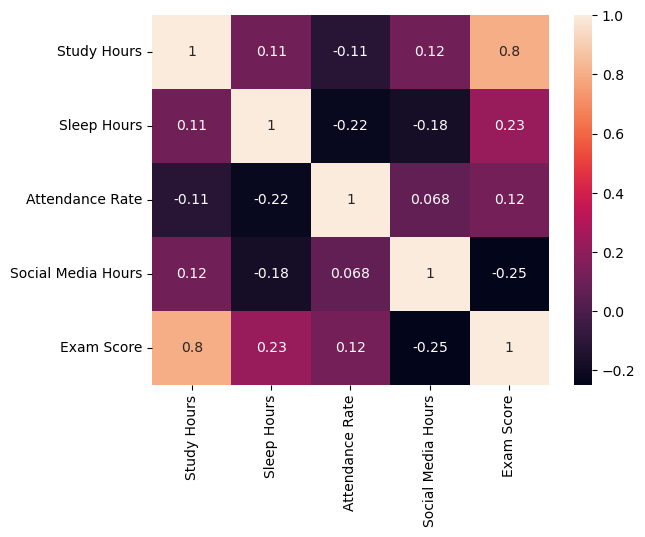

In [8]:
cor_map = df.corr()
sns.heatmap(cor_map, annot=True)
plt.show()

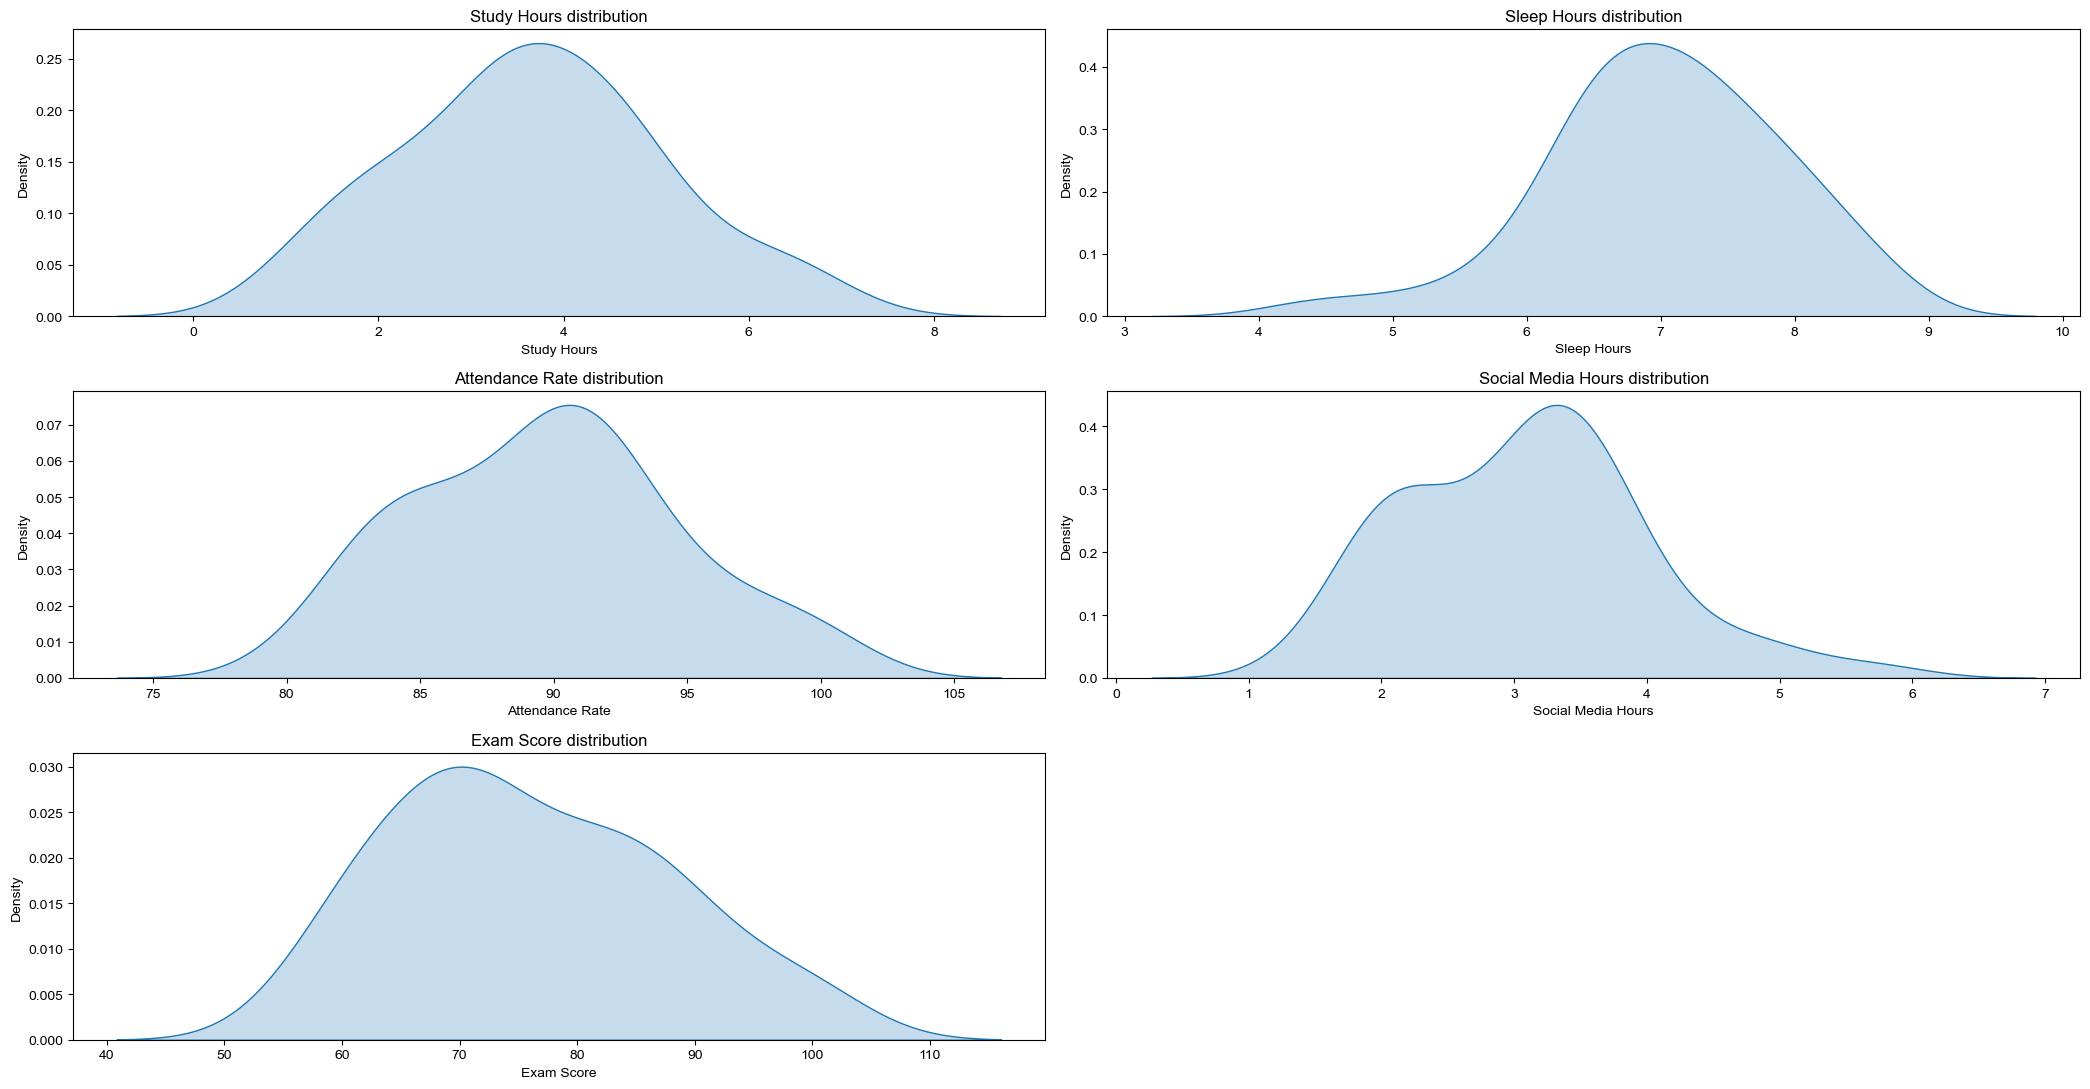

In [9]:
columns = df.columns
(fig, ax) = plt.subplots(3,2,figsize=(21,11))
ax = ax.flatten()

for i, col in enumerate(columns):
    sns.set_style("whitegrid")
    sns.kdeplot(
        x = col,
        fill=True,
        data = df,
        ax=ax[i]
    )
    ax[i].set_title(f"{col} distribution")
    ax[i].set_xlabel(f"{col}")

for i in range(i+1, len(ax)):
    ax[i].axis("off")

plt.tight_layout()
plt.show()

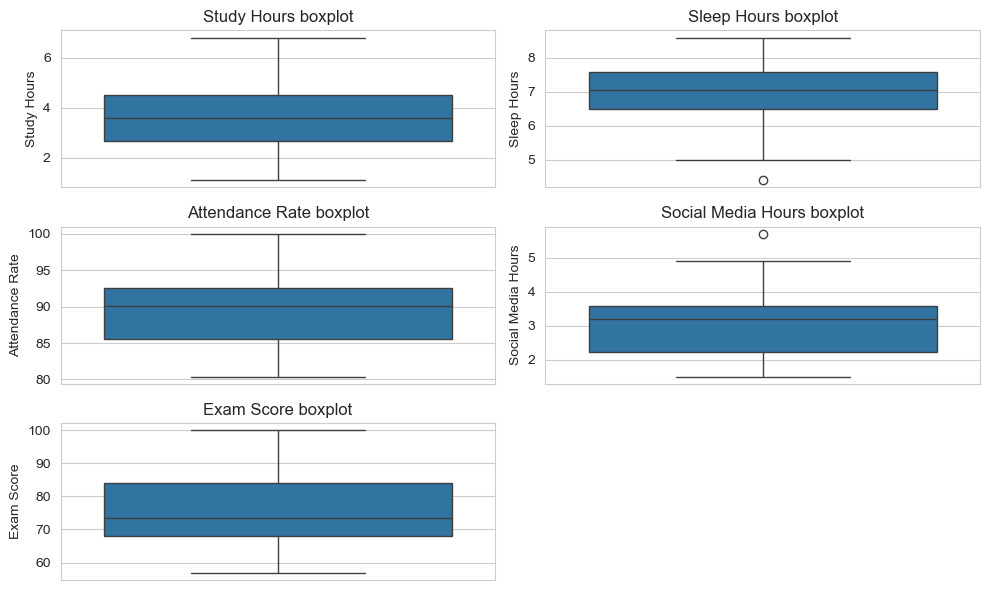

In [10]:
(fig, ax) = plt.subplots(3,2,figsize=(10,6))
ax = ax.flatten()

for i, col in enumerate(columns):
    sns.set_style("whitegrid")
    sns.boxplot(
        y=col,
        data=df,
        ax=ax[i]
    )
    ax[i].set_title(f"{col} boxplot")

for i in range(i+1, len(ax)):
    ax[i].axis("off")

plt.tight_layout()
plt.show()

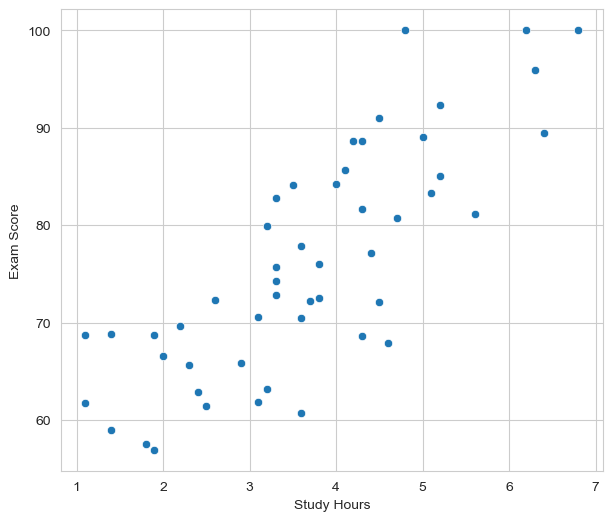

In [11]:
plt.figure(figsize=(7,6))
sns.set_style("whitegrid")
sns.scatterplot(x="Study Hours", y="Exam Score", data=df)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

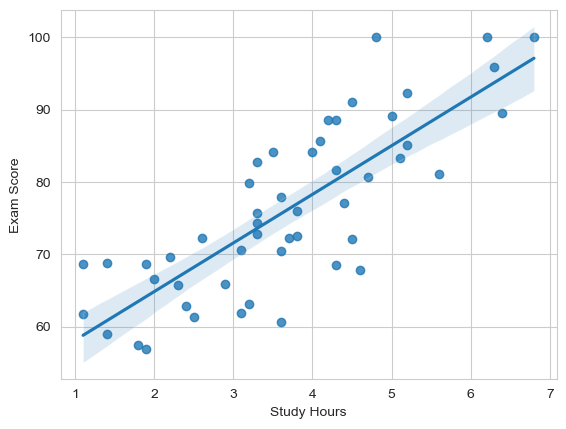

In [12]:
sns.regplot(x="Study Hours", y="Exam Score", data=df)
plt.show()
# sns kütüphanesinin regplot metodu ile iki değişken arasındaki ilişkiyi görebiliriz.
# Ve bu ilişkiyi öğrenecek regresyon modelinin best fit line'ının nasıl gözükeceğini tahmin edebiliriz.
# Bunu çıktımız ve diğer tüm değişkenlerimiz için yapabiliriz.

# Model Building

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [14]:
X = df.iloc[:,:-1] # Son kolon hariç bütün kolonlar
y = df.iloc[:,-1] # Sadece son kolon

#X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
#y = df["Exam Score"]
# En üstteki yöntem yalnızca çıktımız son kolonda ise geçerlidir.

In [15]:
print(X.head())
print(X.shape)
print(y.shape)
# Burada verilerimizin şekillerini gösteriyoruz.

   Study Hours  Sleep Hours  Attendance Rate  Social Media Hours
0          4.7          7.3             82.9                 3.3
1          3.8          6.6             87.9                 3.3
2          5.0          6.3             88.3                 2.3
3          6.3          7.6             86.0                 3.2
4          3.6          8.0             89.2                 3.3
(50, 4)
(50,)


In [16]:
# Train - Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
print("X Train\n", X_train)
print("X Test\n", X_test)
print("y train\n", y_train)
print("y test\n", y_test )
# Verimize train - test split işlemini uyguluyoruz.

X Train
     Study Hours  Sleep Hours  Attendance Rate  Social Media Hours
9           4.8          8.0             89.6                 3.7
44          1.8          6.6             91.3                 3.2
47          5.6          7.3             83.4                 3.2
49          1.4          6.8             91.5                 1.9
22          4.1          7.0             97.0                 2.9
25          4.2          7.8            100.0                 3.8
42          3.8          6.3             82.0                 3.2
2           5.0          6.3             88.3                 2.3
46          3.3          7.3             83.8                 2.1
1           3.8          6.6             87.9                 3.3
39          4.3          7.5             83.8                 1.5
18          2.6          7.4             95.7                 2.8
24          3.2          4.4             92.9                 3.3
40          5.1          7.1             91.1                 2.6
6

In [17]:
# standartization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X Train Scaled:\n", X_train_scaled)
print("X Test Scaled:\n", X_test_scaled)
# Verilerimizi aynı ölçeğe getirmek ve ağırlıklarını daha rahat güncellemek için standartizasyon yapıyoruz.

X Train Scaled:
 [[ 7.64922342e-01  1.07637448e+00  2.70413080e-03  6.75932027e-01]
 [-1.60676425e+00 -3.94765312e-01  3.42883785e-01  1.46070057e-01]
 [ 1.39737210e+00  3.40804586e-01 -1.23795108e+00  1.46070057e-01]
 [-1.92298913e+00 -1.84602484e-01  3.82904921e-01 -1.23157107e+00]
 [ 2.11528804e-01  2.55603439e-02  1.48348616e+00 -1.71847126e-01]
 [ 2.90585024e-01  8.66211656e-01  2.08380319e+00  7.81904421e-01]
 [-2.56398550e-02 -7.10009554e-01 -1.51809903e+00  1.46070057e-01]
 [ 9.23034781e-01 -7.10009554e-01 -2.57433252e-01 -8.07681490e-01]
 [-4.20920953e-01  3.40804586e-01 -1.15790881e+00 -1.01962628e+00]
 [-2.56398550e-02 -3.94765312e-01 -3.37475524e-01  2.52042451e-01]
 [ 3.69641243e-01  5.50967414e-01 -1.15790881e+00 -1.65546064e+00]
 [-9.74314491e-01  4.45886000e-01  1.22334877e+00 -2.77819520e-01]
 [-4.99977173e-01 -2.70655642e+00  6.63052872e-01  2.52042451e-01]
 [ 1.00209100e+00  1.30641758e-01  3.02862649e-01 -4.89764308e-01]
 [ 2.02982186e+00 -8.15090968e-01  1.96373979

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Modelimizi oluşturduk ve eğitim veri setlerimiz ile verimizi eğittik.

LinearRegression()

In [19]:
print("Coefficent: ", model.coef_)
print("Intercept: ", model.intercept_)
# Modelimizin değişkenlere göre ağırlığıkları ve y-kesişim noktasını gösterdik.

Coefficent:  [ 9.28014703  1.78967062  3.24340001 -4.08127695]
Intercept:  77.41081081081082


In [20]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [21]:
student = [[5, 7, 90, 4]]
student_scaled = scaler.transform(student)
print(model.predict(student_scaled))
# Burada bir öğrenci oluşturduk, bağımsız değişkenlerini normal şekilde verdik. Oluştururken sadece liste değil, matrix veya df olmasına dikkat ediyoruz
# Daha sonra tahmin edeceğimiz veriyi standartize ediyoruz.
# Ve tahminimizi yapıyoruz.

[82.23465969]


In [22]:
y_pred = model.predict(X_test_scaled)
# Burada test için ayırdğımız ve standartize edilmiş X verilerinden bir tahmin yapıyoruz.
# Daha sonra bununla gerçek sonuçları karşılaştıracağız.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
# Modelimizin başarı metriklerini inceliyoruz.
# Modelimizin hata metrikleri ve veriye uygunluğu gayet normal ve iyi durumda, demek ki tahminlerimiz gerçeğe yakın olacak.

MSE: 14.600589378986276
MAE: 3.2770264859627867
RMSE: 3.821071757895457
R2: 0.9156707345772709


In [24]:
def adj_r2_score(rsqr, n, p):
    adj_r2 = 1-(1-rsqr)*(n-1)/(n-p-1)
    return adj_r2

# R2 score'u üzerinden düzeltilmiş R2 score'unu hesaplayan bir fonksiyon oluşturduk.

In [25]:
adjr2 = adj_r2_score(rsqr=r2, n=len(y_test), p=X_test_scaled.shape[1])
print("Adjusted R2:", adjr2)
# Modelimizin adjusted R2 score'u da gayet iyi gözükmektedir.

Adjusted R2: 0.8735061018659063


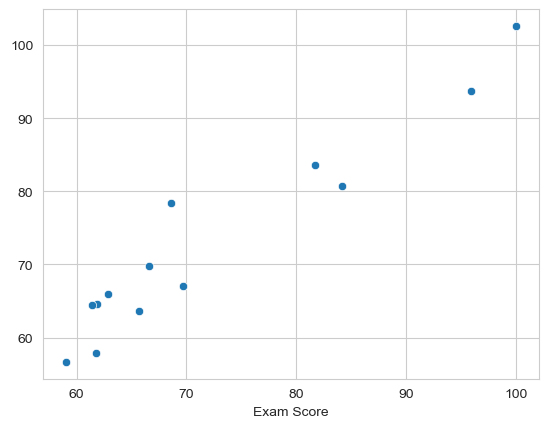

In [26]:
sns.scatterplot(x=y_test, y=y_pred)
plt.show()
# Burada tahminlerimizle gerçek sonuçları scatterplot üzerinde karşılaştırıyoruz.

In [27]:
print(type(y_test))
print(type(y_pred))
print(y_test)
print(y_pred)
# gerçek veri ve tahmin verisini birbirinden çıkarıp residuals değerlerini hesaplayabiliriz.

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
35     69.7
37     61.8
41     81.7
26     65.7
38     66.6
43     84.1
3      95.9
33     62.9
30     61.9
36     68.6
14     59.0
16     61.4
20    100.0
Name: Exam Score, dtype: float64
[ 67.04704385  57.90545589  83.63084813  63.69399367  69.73079557
  80.76485587  93.76445033  65.93953528  64.58675718  78.42296106
  56.67860558  64.44046585 102.60438643]


35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


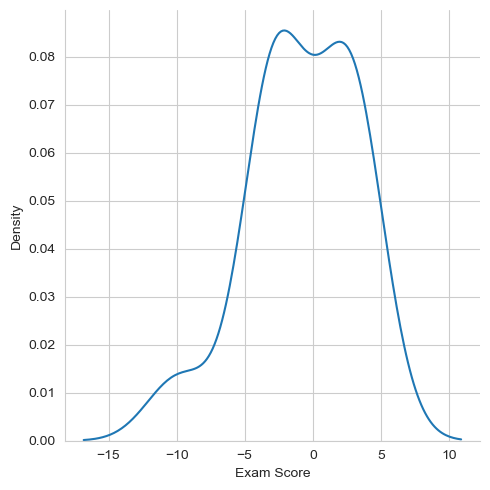

In [28]:
residuals = y_test - y_pred
print(residuals)
sns.displot(x=residuals, kind="kde")
plt.savefig("residuals")
plt.show()
# residuals değerlerinin dağılım grafiğini çizdik.

In [29]:
students = [
    [6, 8, 95, 5],
    [3, 6, 85, 4],
    [4, 7, 80, 3]
]
print("Predictinos: \n", model.predict(scaler.transform(students)))
# Üç öğrencinin verisini içeren bir matris oluşturduk.
# Daha sonra bu matrisi transform ettik ve üç öğrenci için tahminde bulunduk.

Predictinos: 
 [90.37189122 62.43586785 72.73292556]
